In [80]:
# Solution is available in the other "sandbox_solution.py" tab
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [29]:
def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('./datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    # TODO: Initialize session variables
    session.run(tf.global_variables_initializer())

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed`
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

Extracting ./datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz
Loss: 6.95888996124


In [33]:
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('./datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

Extracting ./datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz


In [37]:
train_features.shape[0]  * train_features.shape[1] * 4

172480000

In [39]:
train_features.size * 4

172480000

In [40]:
train_labels.size * 4

2200000

In [47]:
weights.shape[0] * weights.shape[1] * 4

Dimension(31360)

In [50]:
bias.shape

TensorShape([Dimension(10)])

In [52]:
50000 / 128, 50000 % 128

(390, 80)

In [66]:
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    output_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
        
    return output_batches

In [74]:
from pprint import pprint

# 4 Samples of features
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 Samples of labels
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]

# PPrint prints data structures like 2d arrays, so they are easier to read
pprint(batches(3, example_features, example_labels))


[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]


Extracting ./datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.0966000035405


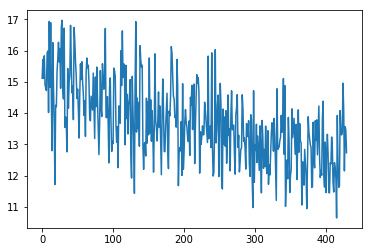

In [84]:
learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('./datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()
loss = []
with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        _, l = sess.run([optimizer, cost], feed_dict={features: batch_features, labels: batch_labels})
        loss.append(l)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))
plt.plot(loss)


In [87]:
cost_hist, acc_hist = [], []
def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    global cost_hist, acc_hist
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))
    
    cost_hist.append(current_cost)
    acc_hist.append(valid_accuracy)

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('./datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 100
learn_rate = 0.001

train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Extracting ./datasets/ud730/mnist/train-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/train-labels-idx1-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-images-idx3-ubyte.gz
Extracting ./datasets/ud730/mnist/t10k-labels-idx1-ubyte.gz
Epoch: 0    - Cost: 11.4     Valid Accuracy: 0.0762
Epoch: 1    - Cost: 10.8     Valid Accuracy: 0.0898
Epoch: 2    - Cost: 10.2     Valid Accuracy: 0.102
Epoch: 3    - Cost: 9.69     Valid Accuracy: 0.12 
Epoch: 4    - Cost: 9.21     Valid Accuracy: 0.133
Epoch: 5    - Cost: 8.78     Valid Accuracy: 0.154
Epoch: 6    - Cost: 8.4      Valid Accuracy: 0.176
Epoch: 7    - Cost: 8.07     Valid Accuracy: 0.196
Epoch: 8    - Cost: 7.78     Valid Accuracy: 0.216
Epoch: 9    - Cost: 7.51     Valid Accuracy: 0.24 
Epoch: 10   - Cost: 7.26     Valid Accuracy: 0.257
Epoch: 11   - Cost: 7.02     Valid Accuracy: 0.276
Epoch: 12   - Cost: 6.8      Valid Accuracy: 0.295
Epoch: 13   - Cost: 6.6      Valid Accuracy: 0.31 
Epoch: 14   - Cost: 6.4      Valid Accurac

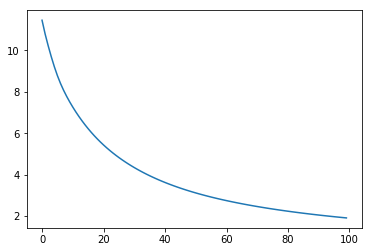

In [94]:
plt.plot(cost_hist)

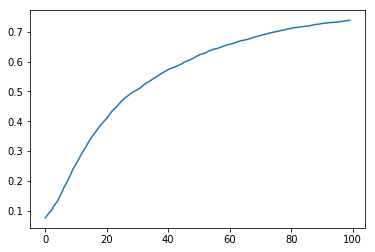

In [95]:
plt.plot(acc_hist)